In [47]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

# setting parameters for rc
plt.rc("font", size=14)

import seaborn as sns

from sklearn import preprocessing
data_df = pd.read_csv("data.csv")
%matplotlib inline

# Spotify Song Attributes EDA


In [48]:
'''
EDA:
acousticness -  from 0 to 1
danceability - from 0 to 1
duration_ms
energy - from 0 to 1
instrumentalness - from 0 to 1
key -  integer positive number
liveness - from 0 to 1
loudness float negative to -10
mode - 1 or 0
speechiness -  from 0 to 1
tempo - float up to 200
time_signature - 4.0 almost everywhere
valence - from 0 to 1
target - 1 or 0
'''

'\nEDA:\nacousticness -  from 0 to 1\ndanceability - from 0 to 1\nduration_ms\nenergy - from 0 to 1\ninstrumentalness - from 0 to 1\nkey -  integer positive number\nliveness - from 0 to 1\nloudness float negative to -10\nmode - 1 or 0\nspeechiness -  from 0 to 1\ntempo - float up to 200\ntime_signature - 4.0 almost everywhere\nvalence - from 0 to 1\ntarget - 1 or 0\n'

In [49]:
data_df.head()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target,song_title,artist
0,0,0.0102,0.833,204600,0.434,0.021900,2,0.1650,-8.795,1,0.4310,150.062,4.0,0.286,1,Mask Off,Future
1,1,0.1990,0.743,326933,0.359,0.006110,1,0.1370,-10.401,1,0.0794,160.083,4.0,0.588,1,Redbone,Childish Gambino
2,2,0.0344,0.838,185707,0.412,0.000234,2,0.1590,-7.148,1,0.2890,75.044,4.0,0.173,1,Xanny Family,Future
3,3,0.6040,0.494,199413,0.338,0.510000,5,0.0922,-15.236,1,0.0261,86.468,4.0,0.230,1,Master Of None,Beach House
4,4,0.1800,0.678,392893,0.561,0.512000,5,0.4390,-11.648,0,0.0694,174.004,4.0,0.904,1,Parallel Lines,Junior Boys


In [50]:
data_df.describe()

,Unnamed: 0,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,target
count,2017.000000,2017.000000,2017.000000,2.017000e+03,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000,2017.000000
mean,1008.000000,0.187590,0.618422,2.463062e+05,0.681577,0.133286,5.342588,0.190844,-7.085624,0.612295,0.092664,121.603272,3.968270,0.496815,0.505702
std,582.402066,0.259989,0.161029,8.198181e+04,0.210273,0.273162,3.648240,0.155453,3.761684,0.487347,0.089931,26.685604,0.255853,0.247195,0.500091
min,0.000000,0.000003,0.122000,1.604200e+04,0.014800,0.000000,0.000000,0.018800,-33.097000,0.000000,0.023100,47.859000,1.000000,0.034800,0.000000
25%,504.000000,0.009630,0.514000,2.000150e+05,0.563000,0.000000,2.000000,0.092300,-8.394000,0.000000,0.037500,100.189000,4.000000,0.295000,0.000000
50%,1008.000000,0.063300,0.631000,2.292610e+05,0.715000,0.000076,6.000000,0.127000,-6.248000,1.000000,0.054900,121.427000,4.000000,0.492000,1.000000
75%,1512.000000,0.265000,0.738000,2.703330e+05,0.846000,0.054000,9.000000,0.247000,-4.746000,1.000000,0.108000,137.849000,4.000000,0.691000,1.000000
max,2016.000000,0.995000,0.984000,1.004627e+06,0.998000,0.976000,11.000000,0.969000,-0.307000,1.000000,0.816000,219.331000,5.000000,0.992000,1.000000


In [51]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 17 columns):
Unnamed: 0          2017 non-null int64
acousticness        2017 non-null float64
danceability        2017 non-null float64
duration_ms         2017 non-null int64
energy              2017 non-null float64
instrumentalness    2017 non-null float64
key                 2017 non-null int64
liveness            2017 non-null float64
loudness            2017 non-null float64
mode                2017 non-null int64
speechiness         2017 non-null float64
tempo               2017 non-null float64
time_signature      2017 non-null float64
valence             2017 non-null float64
target              2017 non-null int64
song_title          2017 non-null object
artist              2017 non-null object
dtypes: float64(10), int64(5), object(2)
memory usage: 268.0+ KB


In [52]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(data_df, test_size=0.2)
print('Training set size: {}. Test set size: {}'.format(len(train),len(test)))

Training set size: 1613. Test set size: 404


In [80]:
sns.set(style='white')  # white beackground for seaborn plots


In [81]:
continuous=['tempo','acousticness','energy','danceability','acousticness','instrumentalness','liveness','loudness','speechiness','valence','duration_ms','key']

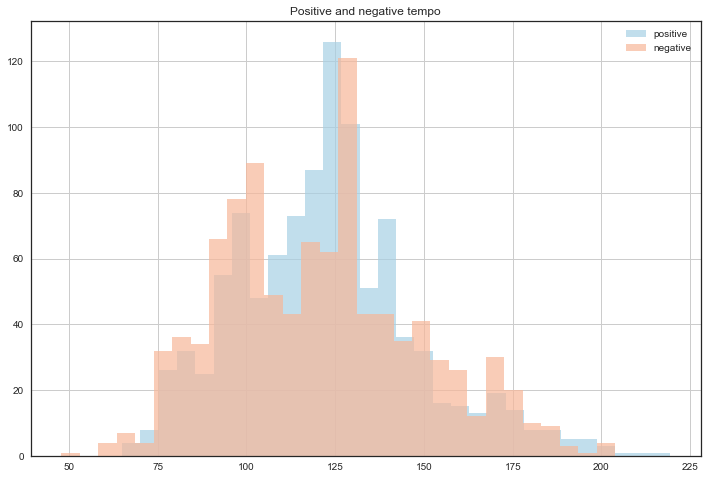

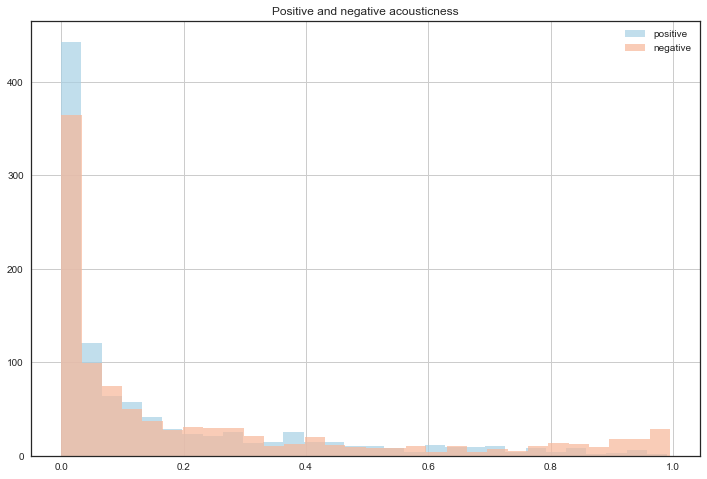

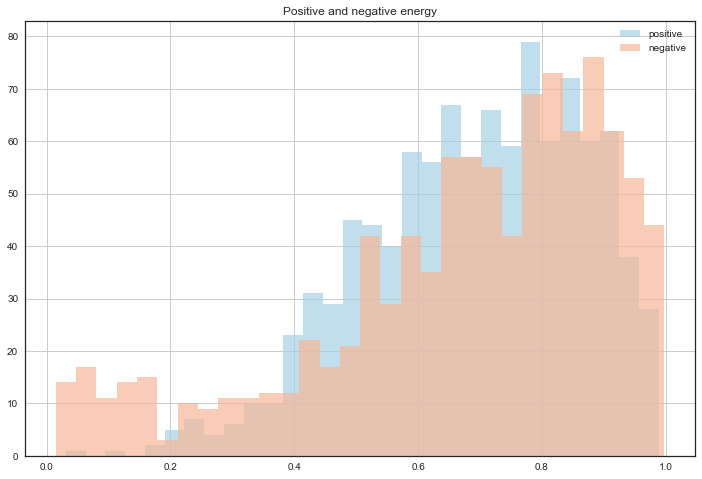

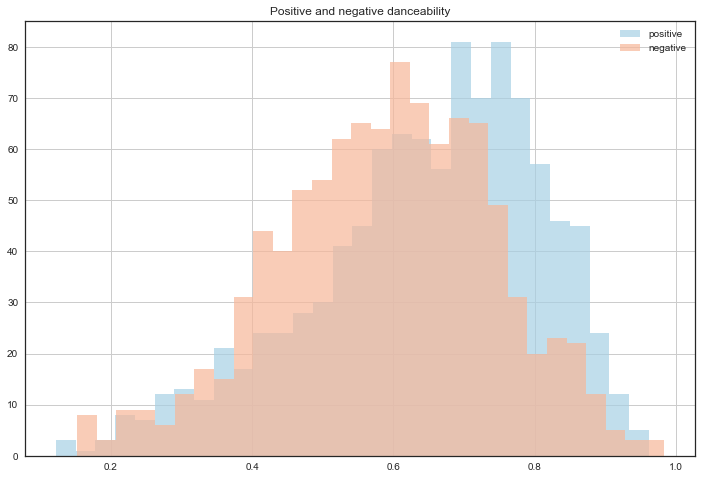

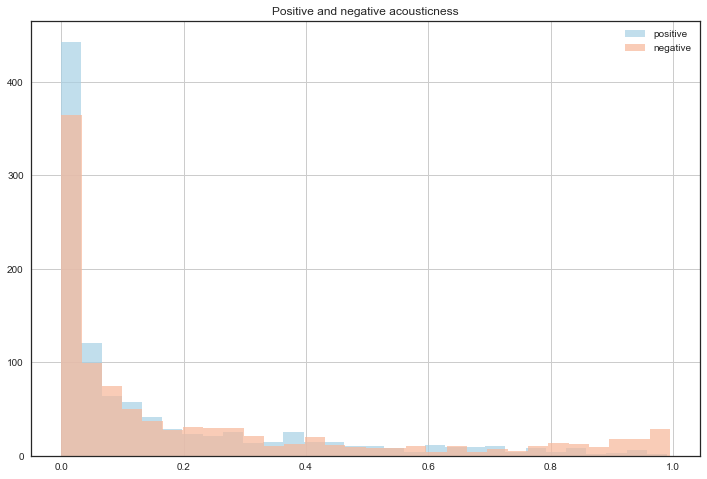

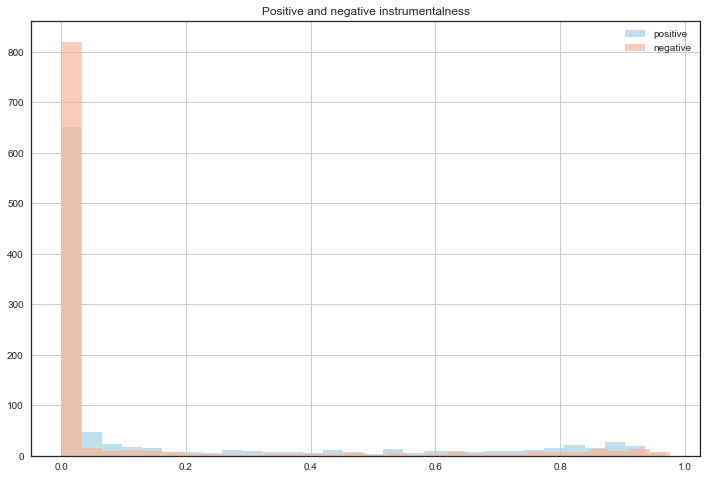

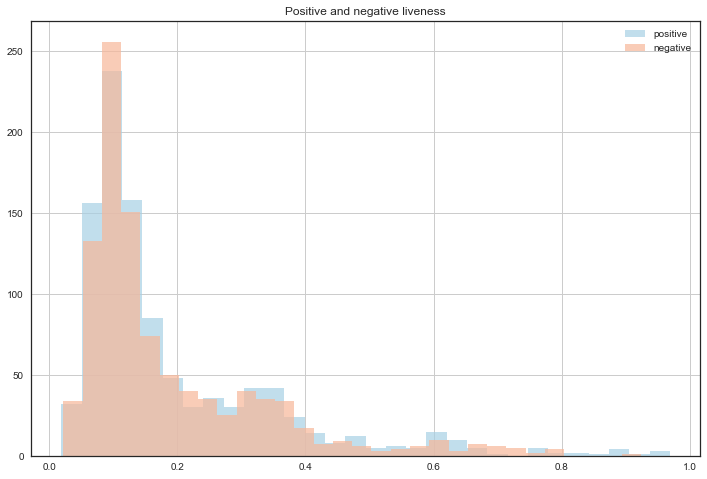

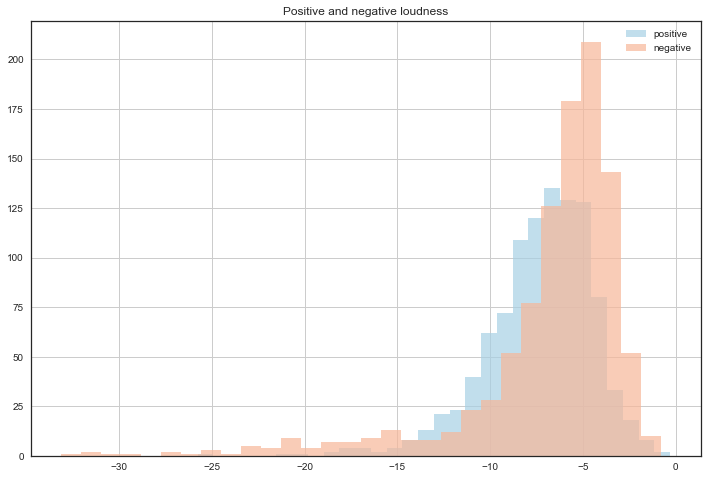

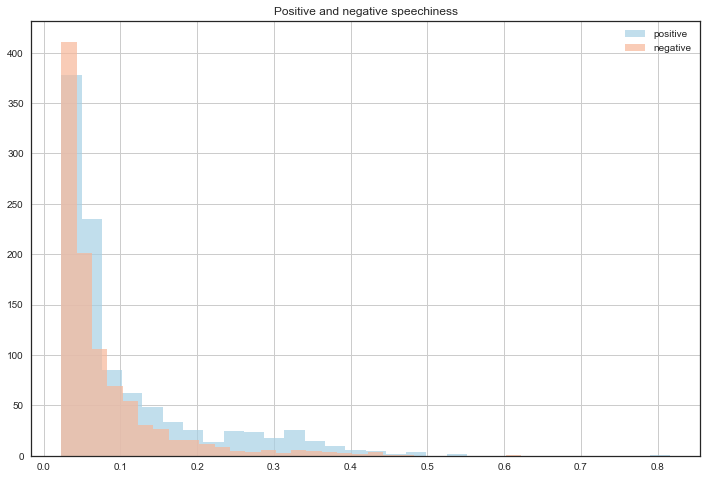

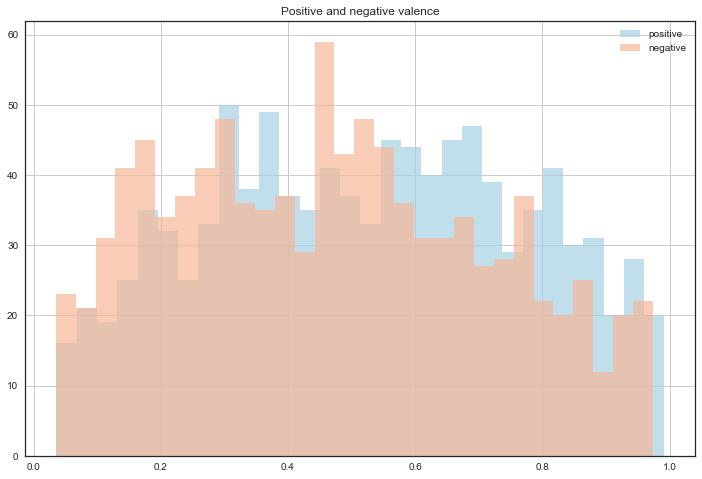

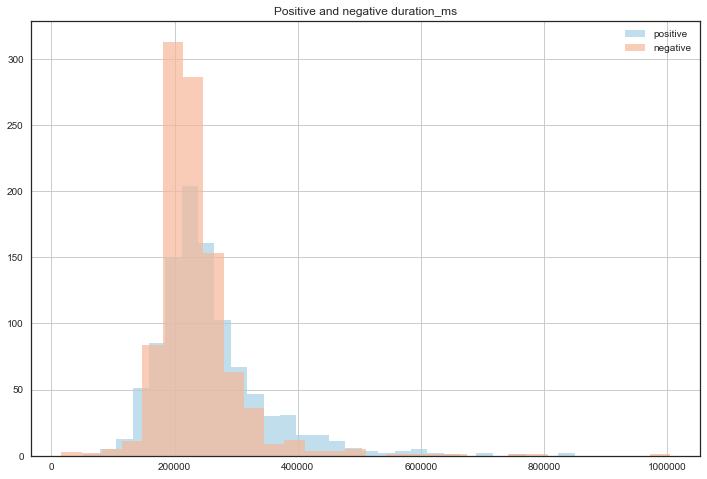

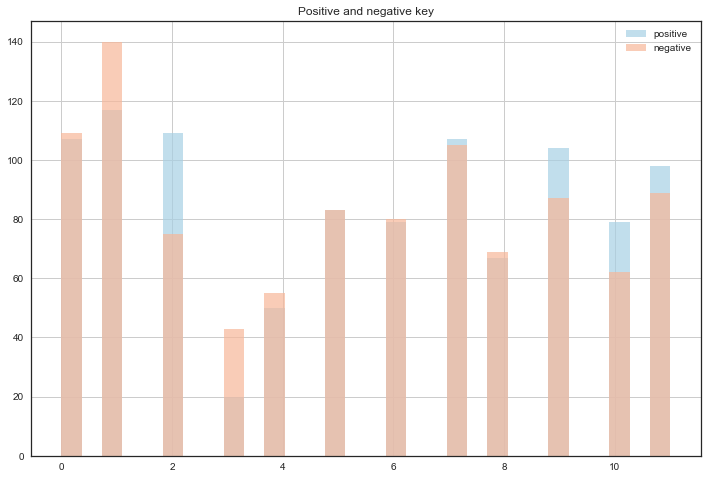

In [88]:
sns.set_palette("RdBu_r",2)
for arg in continuous:
    pos_tempo=data_df[data_df['target']==1][arg]
    neg_tempo=data_df[data_df['target']==0][arg]
    fig=plt.figure(figsize=(12,8))
    plt.title('Positive and negative '+arg)
    pos_tempo.hist(alpha=0.7, bins=30, label='positive')
    neg_tempo.hist(alpha=0.7, bins=30, label='negative')
    plt.legend(loc='upper right')
    plt.show()

In [83]:
#He likes: high valence>0.45, loudness >-15 <-7, high dancebility >0.6

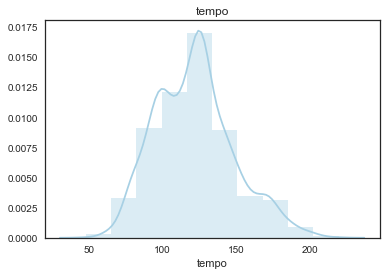

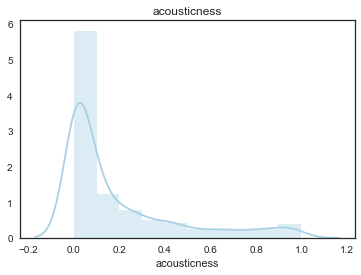

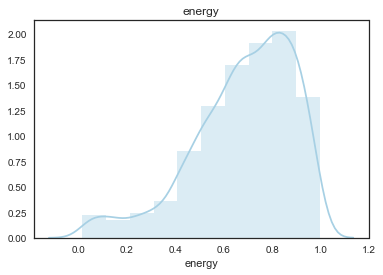

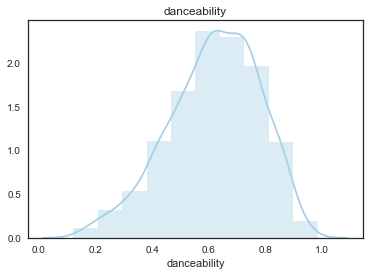

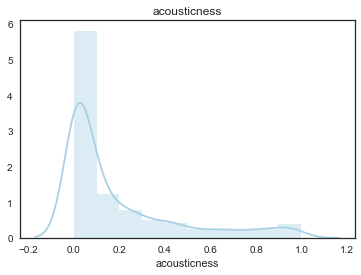

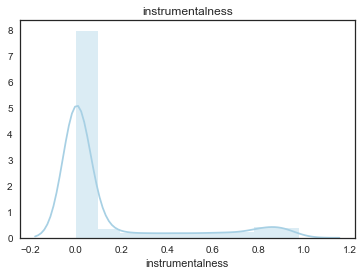

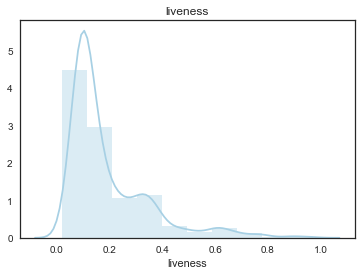

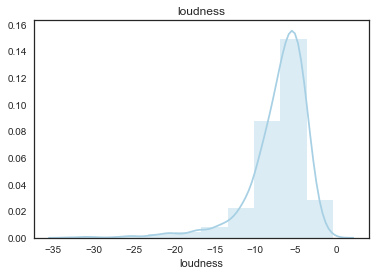

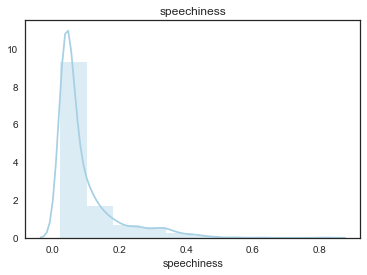

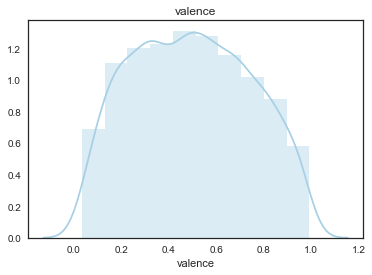

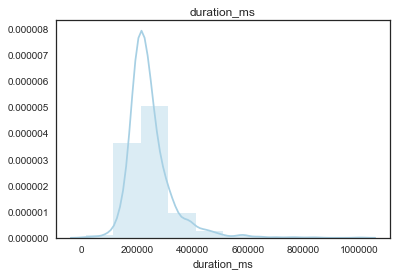

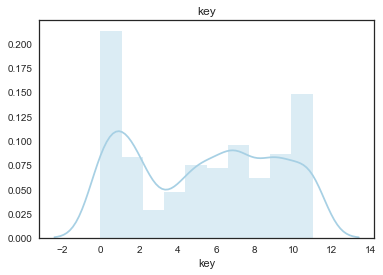

In [89]:
for attr in continuous:
    sns.distplot(data_df[attr], bins=10).set_title(attr)
    plt.figure()

# Machine Learning algorithms

# Decision Trees

In [90]:
from sklearn.tree import DecisionTreeClassifier, export_grapghviz
from sklearn import tree
#problem with trees: overfitting!
classifier=DecisionTreClassifier(min_samples_split=100)

ImportError: cannot import name 'export_grapghviz'